L'apprentissage automatique est en fait une famille d'algorithmes qui apprennent à partir d'exemples. Ces algorithmes "apprennent" en extrayant des caractéristiques des données qui leur ont été fournies afin d'effectuer une tâche spécifique.

Il existe de nombreux types d'algorithmes différents. Ils se répartissent généralement en quatre catégories différentes. Les algorithmes peuvent donc être classés comme suit :

Régression : utilisée pour trouver un nombre sur une dimension continue

Classification : utilisée pour trouver une catégorie

Supervisé : contient des données qui ont été annotées (étiquetées) afin que l'algorithme sache ce qu'il doit rechercher.

Non-supervisé : contient des données qui ne sont pas annotées, et l'algorithme essaie de trouver des similitudes ou des différences pour faire ses propres regroupements dans les données.

# Tableau résumé

https://docs.google.com/spreadsheets/d/1kwQlgbrgxoElq1B92bltUudqzQm45XMZf5kEG1nM17k/edit?usp=drive_link

# REGRESSION

## Regression Linéaire

In [ ]:
# Scikit-Learn peut trouver les coefficients de la régression linéaire
from sklearn.linear_model import LinearRegression

# Tout d'abord, vous devez définir 2 séries :
# X-axis : la colonne corrélée, ici ce sont les heures d'ensoleillement
X = df_weather[['MIN_TEMPERATURE_C']]

# Y-axis : la colonne à prédire, donc ici la température maximale
y = df_weather['MAX_TEMPERATURE_C']


# Pour entraîner un modèle de machine learning (ici, il trouvera l'équation de la régression linéaire), il suffit de lancer la méthode ".fit".
modelLR2 = LinearRegression().fit(X, y)

# Coefficient : c'est le "a" dans votre équation "aX + b"
print("coefficient :",modelLR2.coef_)

# Intercept : c'est le "b" dans votre équation "aX + b"
print("intercept :", modelLR2.intercept_)



df_weather['predict2']=modelLR2.predict(df_weather[['MIN_TEMPERATURE_C']])

Prédire juste une température

In [ ]:
# Vous pouvez "prédire" la température maximale à partir des heures d'ensoleillement
# Par exemple, essayons avec 10 heures d'ensoleillement

# Calcul manuel :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# Avec une fonction de Scikit-Learn :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

## Figure regression linéaire exemple

In [ ]:
plt.figure (figsize=(10,8))
plt.scatter(X,y,alpha=0.4)
plt.plot(X_test,y_pred, color = 'red', label= 'ligne regression')
plt.title("blabla")
plt.xlabel("GDP")
plt.ylabel("exp")
plt.grid(True)
plt.show()

## Regression Linéaire Multiple

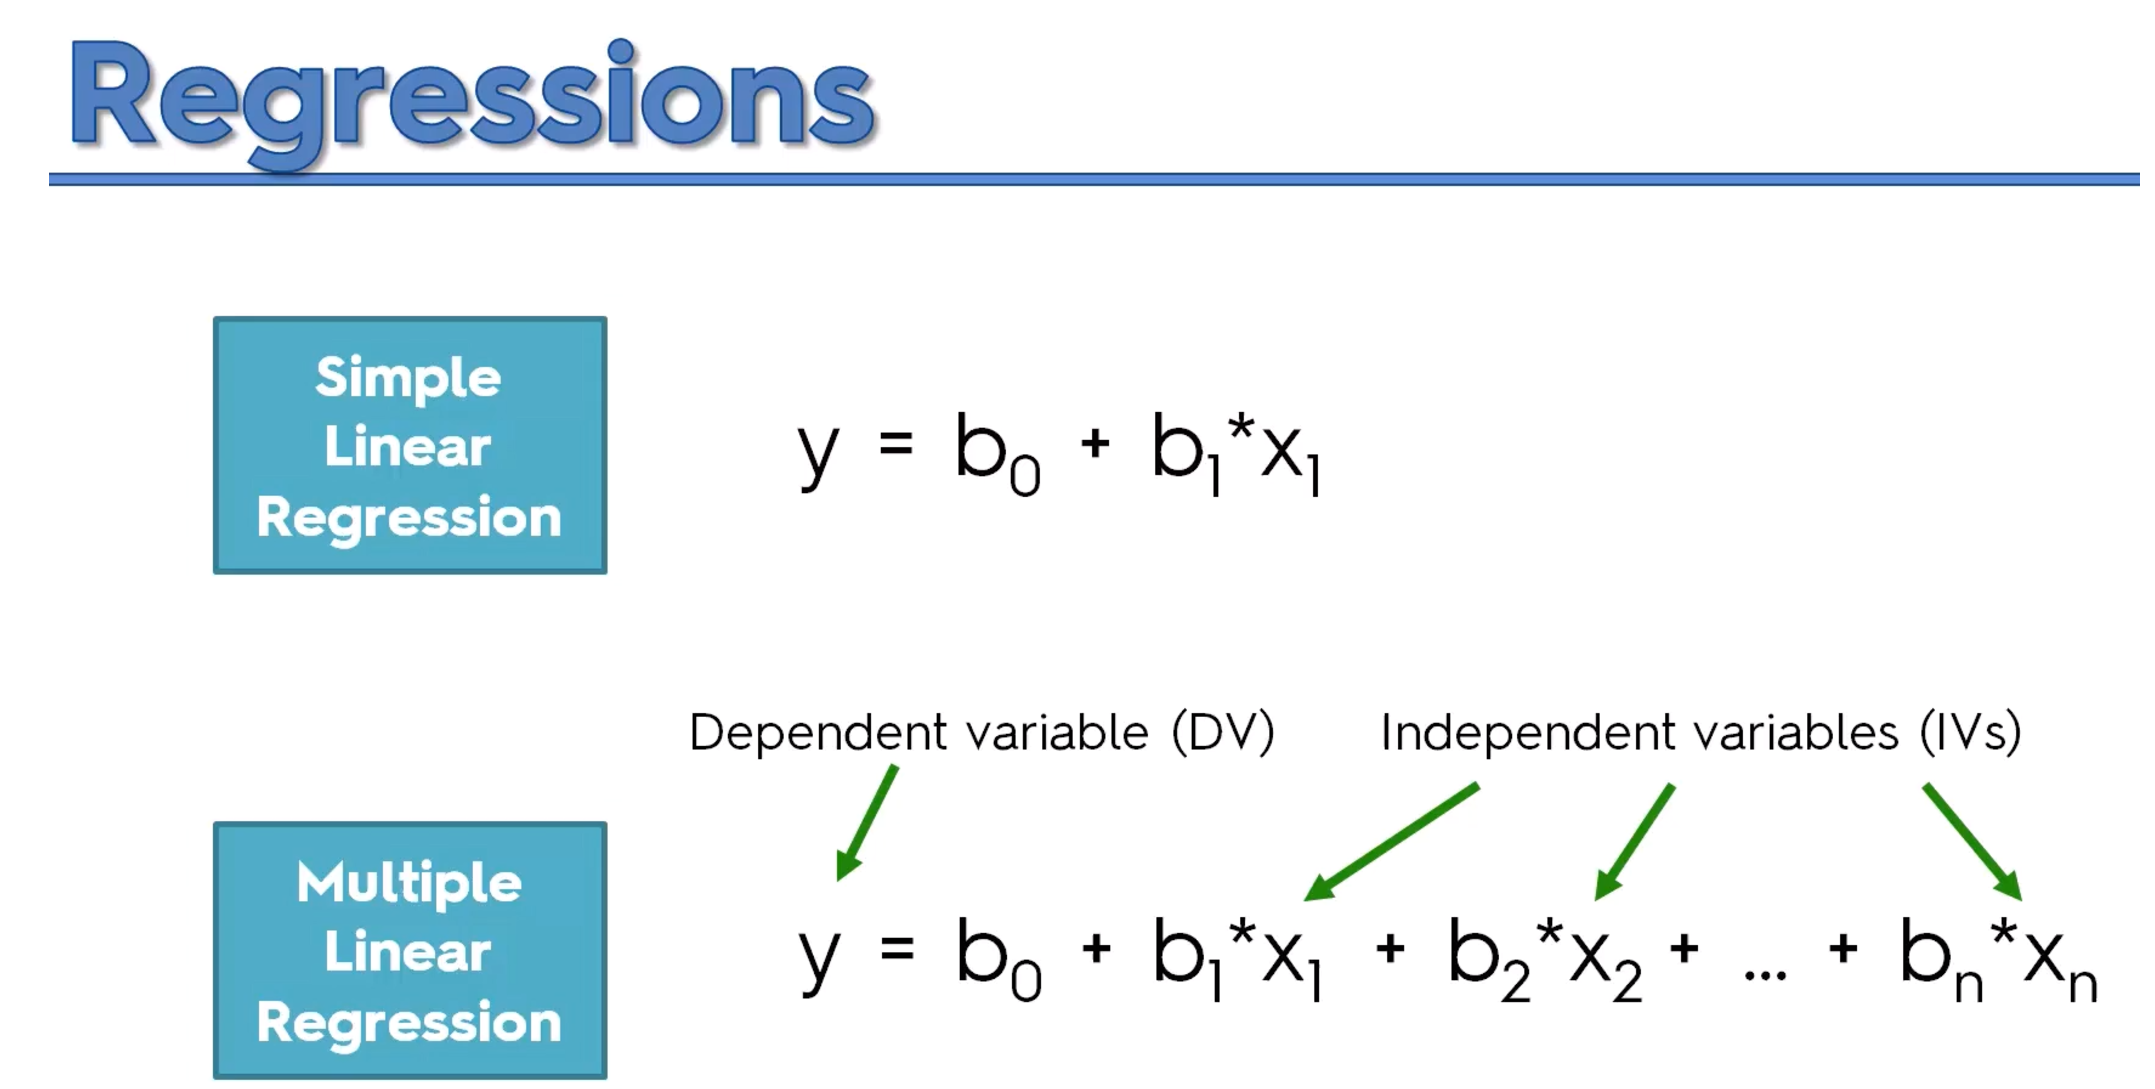

Tout est dans la formule. Nous n'avons plus un seul x1 dans notre équation, mais un nombre n de x : X1, X2... Xn.

Par exemple, si nous essayons de prédire quelque chose comme le prix des logements (y, qui est la variable dépendante), nous pouvons maintenant utiliser plusieurs variables explicatives(X1, X2, ... Xn) qui correspondent le mieux à nos données. Des exemples de variables explicatives possibles pourraient être :

la taille de la maison,
le nombre de pièces,
la couleur de la maison,
si la maison se trouve à proximité d'une école ou non.
etc...

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b

In [ ]:
from sklearn.linear_model import LinearRegression
X = df[['variable_column1', 'variable_column2', 'variable_column3']]
y = df['target_column']

# We train a "model" with "fit" function. This model will store coefficients after training.
model = LinearRegression().fit(X, y)

In [ ]:
print("coefficient :",model.coef_)
>>> array([ 5.74318411e-01, 2.43528776e-03, 8.26837441e-01])

print("interception :",model.intercept_)
>>> 3.9503110458650266

In [ ]:
for i, j in zip (X.columns, model.coef_):
  print(i,j)

>>> variable_column1 5.74318411e-01
>>> variable_column2 2.43528776e-03
>>> variable_column3 8.26837441e-01

In [ ]:
# Example of predict function:
print(model.predict([[10, 2, 15]]))

>>> 22.100927346385028

## Train Test Split

Traditionnellement, vous divisez votre ensemble de données initial en :

- X : vos variables explicatives, avec une ou plusieurs colonnes.
- y : votre cible, avec une seule colonne.

Après la division train-test, vous obtiendrez 4 jeux de données :

- X_train : variables explicatives de l'ensemble train
- X_test : variables explicatives de l'ensemble de test
- y_train : cible de l'ensemble de formation
- y_test : cible de l'ensemble de test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state= 42)

In [ ]:
# Formation du modèle sur train
newmodel = LinearRegression().fit(X_train, y_train)

# sortir score :
print("\nScore for the Train dataset :", newmodel.score(X_train, y_train))
print("Score for the Test dataset :", newmodel.score(X_test, y_test))

In [ ]:
# le point score dans un modèle de regression est égal au r2

## Overfitting et underfitting

**Mais comment déterminer si notre modèle est bon ?**

Nous utilisons des métriques ! Le score le plus connu pour les régressions est le coefficient de détermination R2 (ou R au carré). En statistique, le coefficient de détermination linéaire de Pearson, noté R2 ou r2, est une mesure de la qualité de la prédiction d'une régression linéaire. R2 = Variance expliquée / Variance totale.

Pour simplifier, le R2 mesure la différence entre les valeurs prédites et les valeurs réelles. Un bon score R2 signifie que nous minimisons la distance entre chaque valeur réelle et le modèle prédictif.

Le R-carré est toujours compris entre 0 et 1 :

- 0 indique que le modèle n'explique aucunement la variabilité des données de réponse autour de sa moyenne.
- 1 indique que le modèle explique parfaitement toute la variabilité des données de réponse.

Avec SciKit-Learn, il est très facile de scorer un modèle, il suffit d'utiliser la méthode .score().

In [ ]:
model.score(X,y)

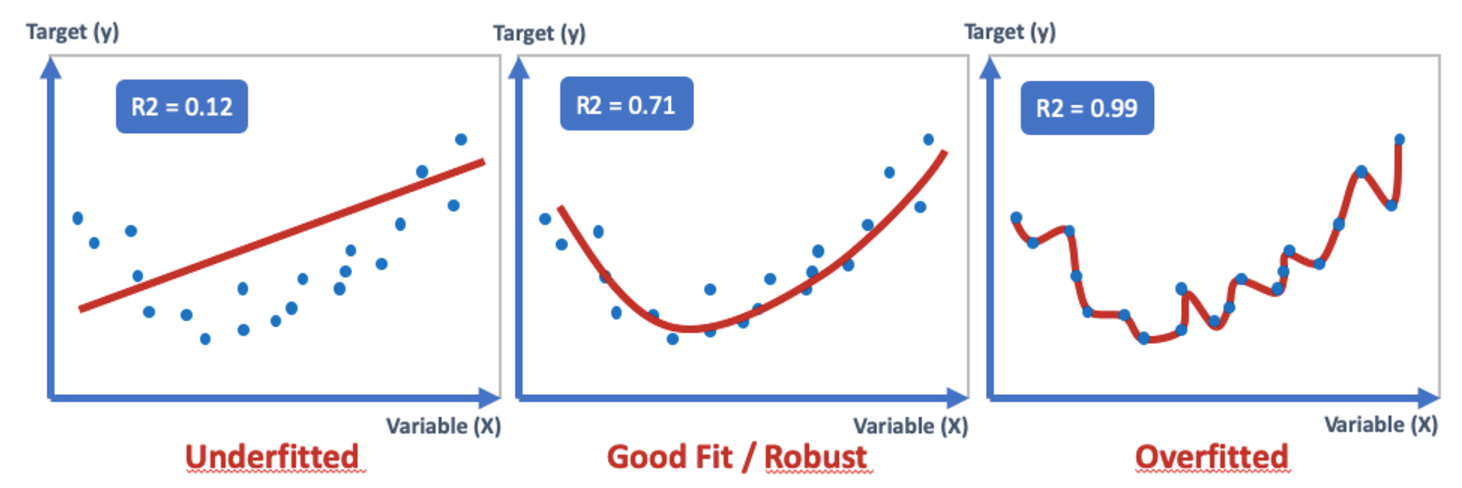

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test,y_pred)  #calucl R2

## création fonction pour tester plusieur modèle

https://colab.research.google.com/drive/1mSoLaFdCcE6nnFkoh5tL6MlbV3pOmISR?usp=sharing

# Classification

## K-Nearest Neighbours

L'algorithme k-Nearest Neighbours (abrégé en k-NN ou la méthode KNN) est un type d'algorithme de "machine learning supervisé".

l'apprentissage supervisé se produit lorsque ton dataset contient déjà une valeur cible y, alors que l'apprentissage non-supervisé n'en contient pas.

K-NN peut être utilisé pour résoudre à la fois les problèmes de classification et de régression.

En bref, l'apprentissage supervisé se produit lorsque ton dataset contient déjà une valeur cible y, alors que l'apprentissage non-supervisé n'en contient pas.

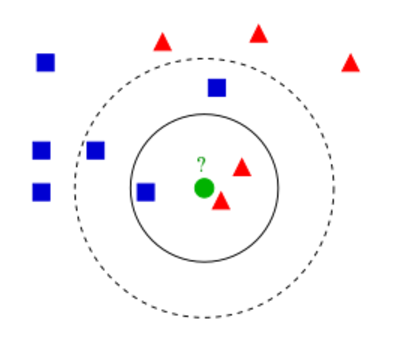

k fait référence au nombre de voisins les plus proches des données que nous essayons de classer.

donc K=3 donne ?= triangle

alors que K=5 donne ?=carré

### Paramètre

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

- **k voisins**

Tu peux changer le nombre de voisins avec le paramètre n_neighbors. La valeur par défaut est 5.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors = 7)
modelKNN.fit(X_train, y_train)

- **Poids**

Par défaut, chaque voisin a un poids égal ("uniforme"). Tu peux le modifier pour tenir compte de la distance. Sur l'exemple de l'image ci-dessus, dans le cas de 3 voisins, la prédiction aurait alors été "carré bleu - classe 1", car il y a un carré bleu très proche (avec plus de poids), et 2 triangles rouges lointains (avec moins de poids).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(weights="distance")
modelKNN.fit(X_train, y_train)

*doc officielle :* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- **Notion de distance**


Traditionnellement, nous utilisons la distance euclidienne pour déterminer quels sont les plus proches voisins. C'est la distance que tu as apprise en géométrie au collège. On calcule une "diagonale" entre deux points

- **test paramètre**

In [ ]:
from sklearn.metrics import accuracy_score
Weights =['uniform','distance']
for i in range(2,11):
  for w in Weights:
    model = KNeighborsClassifier(n_neighbors=i,weights=w)
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'pour {i} et {w}  test accu {test_accuracy}')


### Préparation des données


Parfois, les données ne sont pas comme nous le souhaiterions. Souvent, nous avons des catégories que nous aimerions utiliser comme variable (X), mais scikit-learn n'accepte que les données numériques.

Il y a deux façons de les transformer : Flactoriser ou Get Dummies

- **Factoriser**

Dans le premier cas, nous les transformons en numérotant les catégories. Comme ceci

In [ ]:
df_animals['animaux_nb'] = df_animals['animaux'].factorize()[0]

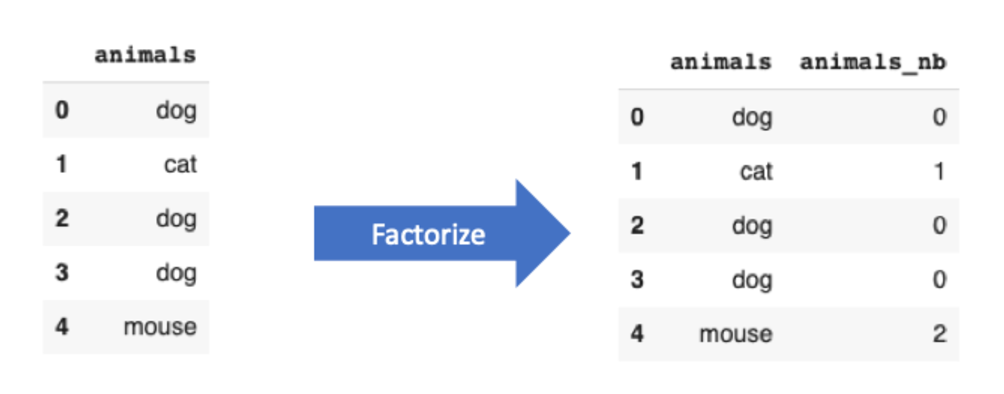

Le problème est le suivant : pour l'algorithme de machine learning, les nombres sont ordonnés. Ainsi, dans cet exemple, le chat et la souris sont proches (avec des valeurs de 1 & 2), tandis que le chien et la souris sont deux fois plus éloignés (0 & 2). Alors que ca dépend seulement de l'ordre dans lequel on les a affichés.
L'algorithme de KNN risque donc de se tromper en trouvant des voisins plus proches avec le chat qu'avec le chien...

- **Get Dummies**

Nous préférons alors créer autant de colonnes binaires que de catégories. Le DataFrame créé est grand, mais les résultats sont meilleurs

In [ ]:
pd.concat([df_animals , df_animals['animaux'].str.get_dummies()],
          axis = 1)

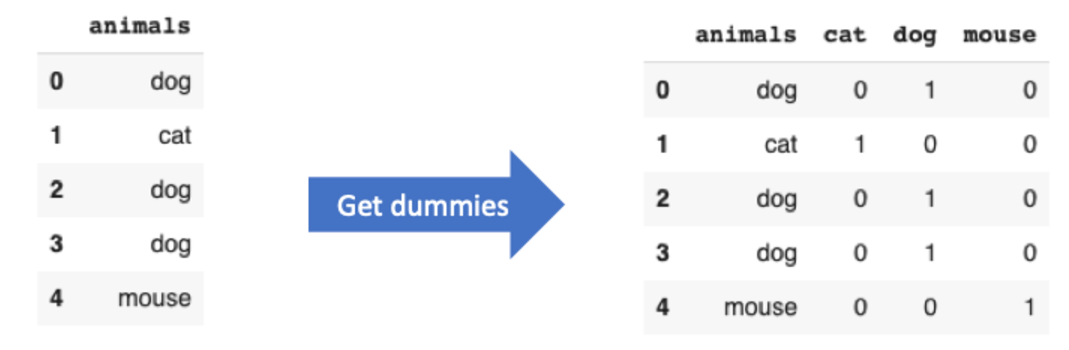

### Métrique

- **Matrice de confusion**

Pour les classifications, nous allons utiliser les matrices de confusions. Puis calculer un certain nombre de métriques grâce à cette matrice.
La matrice de confusion résume les prédictions du modèle. Ici, prenons l'exemple d'une classification qui distingue les chats et les chiens :

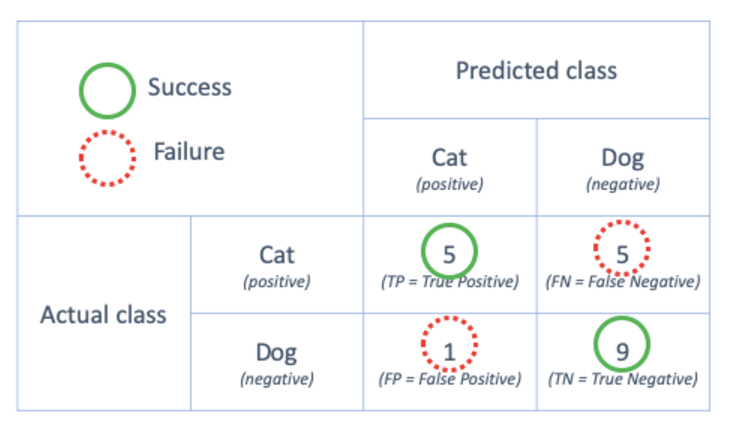

En ligne, la matrice indique les données réelles. Ici il y a 10 chats et 10 chiens dans notre dataset. Nous demandons au modèle de prédire si ce sont des chats ou des chiens. En colonne, la matrice indique ce qui a été prédit par le modèle. Entraine-toi pour voir si tu arrives bien à lire la matrice de confusion

Comment interpréter cette matrice de confusion?

On essaie de prédire 20 valeurs (5 + 5 + 1 + 9).

Parmi ces valeurs :

Vrai Positif (TP) : 5 chats réels sont correctement prédits.

Faux négatif (FN) : 5 chats réels sont prédits à tort comme étant des chiens.

Faux positif (FP) : 1 vrai chien est prédit à tort comme étant un chat.

Vrai négatif (TN) : 9 chiens réels sont correctement prédits.

- **Quelques métriques** :

**accuracy score** : c'est le nombre de prédictions correctes divisé par le total. Donc (TP + TN) / total.

**Le Recall**  c'est le rapport TP / (TP + FN). Le recall est intuitivement la capacité de l'algorithme à trouver tous les échantillons positifs.

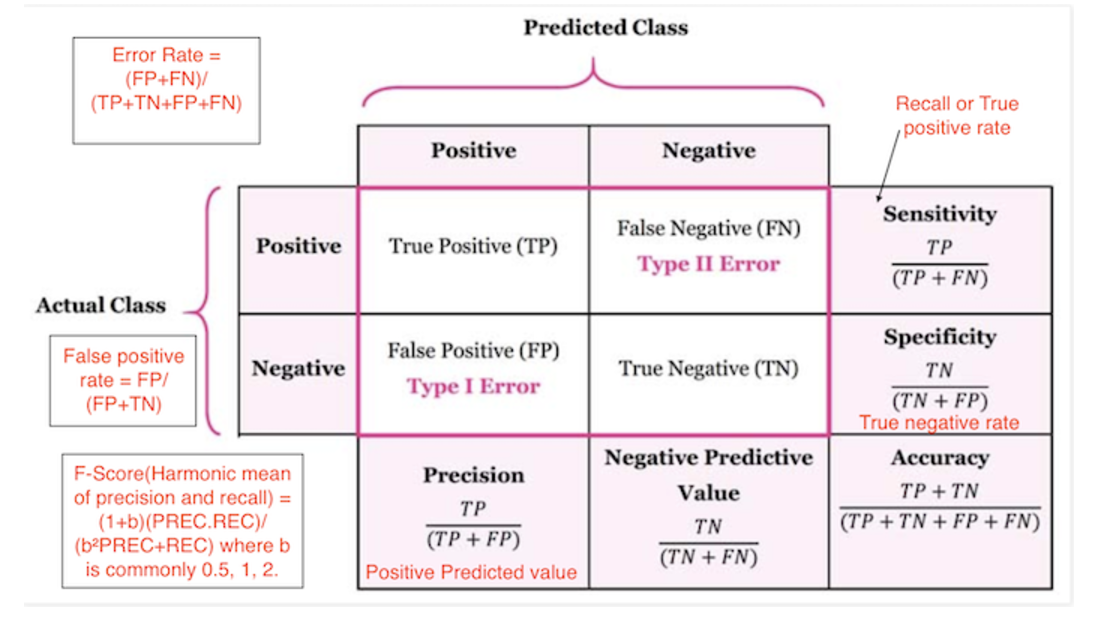

### Métrique avec scikit-learn

- **Score par défaut: accuracy**

La méthode .score() de scikit-learn renvoie par défaut l'accuracy score.

In [ ]:
model.score(X_train, y_train)

>>> 0.72

In [ ]:
# train score
from sklearn.metrics import accuracy_score

y_train_pred = modelKNN.predict(X_train)
# test score
y_test_pred = modelKNN.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)
# Vérification de l'overfitting
if train_accuracy > test_accuracy:
    print("Il y a un risque de surajustement (overfitting).")
elif train_accuracy < test_accuracy:
    print("Le modèle est sous-ajusté (underfitting).")
else:
    print("Le modèle est bien ajusté.")

- **Matrice de confusion avec scikit-learn**

Mais ce n'est pas forcément une bonne métrique. Mieux vaut vérifier avec la matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " actual",
             columns = model.classes_ + " predicted")

- **Et pour des métriques détaillées**

Recall, F1-score :

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

## NearestNeighbors

**Qu'est-ce que c'est ?**

NearestNeighbors est un algorithme qui permet de trouver les points de données les plus proches d'un point donné dans un espace multidimensionnel. Cela peut être utile dans de nombreux cas, comme la classification, la régression, ou la recommandation.

**Comment ça fonctionne ?**

Distance : L'algorithme mesure la distance entre les points de données. Par défaut, il utilise la distance euclidienne, mais d'autres mesures de distance peuvent être utilisées (comme la distance de Manhattan, par exemple).

Recherche des voisins : Lorsque vous lui donnez un point de données, NearestNeighbors recherche les k points les plus proches dans l'ensemble de données. Le paramètre k est un hyperparamètre que vous pouvez définir selon vos besoins.

### Explication simple

1. importer le modèle

In [ ]:
from sklearn.neighbors import NearestNeighbors

2. Création du modèle

In [ ]:
nbrs = NearestNeighbors(n_neighbors=3)  # Ici, on cherche 3 voisins les plus proches

3. ajuster le modèle

In [ ]:
X = [[1, 2], [2, 3], [3, 4], [5, 6]]  # Exemple de données
nbrs.fit(X)

4. Trouver les voisins pour un nouveau point

In [ ]:
distances, indices = nbrs.kneighbors([[2, 2]])  # Cherche les voisins pour le point (2, 2)

5. interpréter les résultats :

distances contiendra les distances entre le point donné et ses voisins les plus proches.
indices contiendra les indices des voisins dans l'ensemble de données d'origine.

- Exemple

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Données d'exemple
X = np.array([[1, 2], [2, 3], [3, 4], [5, 6]])

# Création du modèle
nbrs = NearestNeighbors(n_neighbors=2)  # On cherche 2 voisins les plus proches

# Ajustement du modèle
nbrs.fit(X)

# Recherche des voisins pour un nouveau point
distances, indices = nbrs.kneighbors([[2, 2]])

print("Distances des voisins les plus proches :", distances)
print("Indices des voisins les plus proches :", indices)

Distances des voisins les plus proches : [[1. 1.]]
Indices des voisins les plus proches : [[0 1]]


- Résumé

NearestNeighbors est utilisé pour trouver les points de données les plus proches dans un ensemble de données.

Il mesure la distance entre les points et renvoie les k voisins les plus proches.

C'est utile pour des tâches comme la classification, la régression, ou la recommandation.

### Exemple pokemon

In [ ]:

def similar_pok(pokemon,k,m):

  # on rappel juste avant on a défini nos features et on a crée deux def 1 avec les pokemon legendaire et l'autre sans les pokémon légendaire
  # on commance a normaliser nos données pour crée notre modèle
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(df_non_leg[features])
  #ensuite on crée notre modèle et on l'ajuste
  nn_pok = NearestNeighbors(n_neighbors=k, metric=m)
  nn_pok.fit(X_scaled)
  #ensuite on vérifie que notre pokemon est bien légendaire ou fait parti du df
  if pokemon not in df_leg['Name'].values :
    return (f"{pokemon} n'est pas un pokemon légendaire ou n'apparait pas dans le dataset" )
  # si notre pokemon est ok on va aller chercher les pokemon non légendaire similaire et normalisée ses données
  pokemon1= df_leg[df_leg["Name"] == pokemon]
  pokemon1= scaler.transform(pokemon1[features])

  # on va maintenant chercher ses voisins et sortir leur caractéristique

  distances,indices = nn_pok.kneighbors(pokemon1)
  print(distances)
  return df_non_leg.iloc[indices[0]]

In [ ]:
name_leg = ["Mewtwo", "Lugia", "Rayquaza", "Giratina", "Dialga", "Palkia"]

for i in name_leg :
  print(f'{i} a pour pokemon non légendaire similaire : ')
  display(similar_pok(i,5,'euclidean'))

#Clustering

## K-Means


### Introduction

Scikit-learn possède des modules et des méthodes permettant d'effectuer du clustering avec la méthode des k-means.

Il n'y a pas réellement de risque d'overfitting, car on en sait pas exactement ce qu'on cherche. Donc le train-test-split est facultatif. La syntaxe reste globalement la même. Sauf qu'on ne renseigne pas de target y à l'entrainement du modèle. On doit en revanche renseigner le nombre de clusters attendus.

*L'algorithme KMeans, tout comme le KNN supervisé, se base sur la distance multidimensionnelle entre des points. Il réagit donc fortement à l'échelle. Pour de meilleurs résultats, pensez à normaliser vos données avant de l'entrainer.*

In [ ]:
from sklearn.cluster import KMeans
modelKM = KMeans(n_clusters=2)
modelKM.fit(X)

In [ ]:
#rapelle normalisation des données
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(df[features])

**Centre des clusters**

Tu peux ensuite afficher les coordonnées du centre de chaque cluster obtenu. L'ordre des colonnes est le même que pour ton dataset X. L'ordre des clusters (en ligne) n'a pas d'importance car l'initialisation du modèle est aléatoire. Suivant les entrainements, tu obtiendras donc un ordre différent.

In [ ]:
modelKM.cluster_centers_

**Initialisation non-aléatoire**

Pour avoir un modèle reproductible, tu peux bloquer l'initialisation sur une valeur non-aléatoire. Tu peux choisir n'importe quelle valeur de random_state évidemment.

In [ ]:
from sklearn.cluster import KMeans
modelKM = KMeans(n_clusters=2, random_state=3)
modelKM.fit(X)

**Cluster d'appartenance**

Pour chaque ligne de X, tu peux obtenir le cluster d'appartenance, c'est-a-dire celui qui a le centre de cluster le plus proche.

In [ ]:
modelKM.labels_

**Inertie**

L'inertie représente la notion d'éparpillement des points les uns par rapport aux autres. Un bon clustering a :

- une inertie inter-classe grande : les clusters sont bien séparés les uns des autres
- une inertie intra-classe petite : les points à l'interieur d'un cluster sont denses

On peut obtenir l'inertie avec la commande suivante. C'est une valeur sans échelle, liée à la distance globale. Elle est difficile à interpréter, mais nous nous en servirons dans la méthode *Elbow*.

In [ ]:
modelKM.inertia_

###Métrique

**Méthode elbow**

C'est une méthode visuelle. On fait varier le nombre de clusters et on cherche le coude (elbow en anglais), sur un graphique représentant l'inertie. C'est une méthode visuelle mais pas très précise

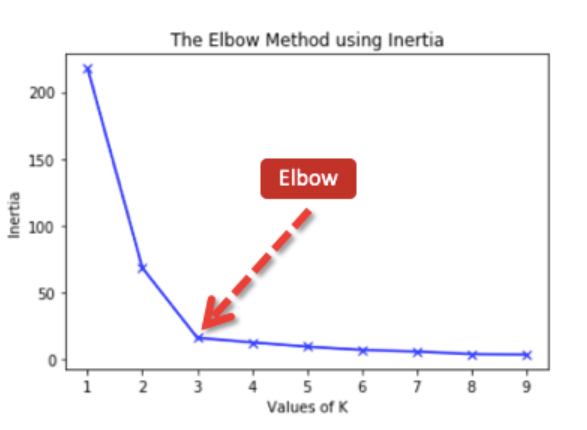

**Méthode Silhouette**

Le score Silhouette est plus précis. Chaque point obtient un score entre -1 et 1.

- -1 : le point est très mal placé, il devrait sans doute être dans un autre cluster
- 0 : il y a hésitation dans le cluster d'appartenance (2 clusters ou plus sont à la même distance)
- 1 : le point est au même endroit que le centre d'un cluster
On calcule ensuite la moyenne de l'ensemble des scores. S'il est proche de 1, tous les points sont très proches de leur clusters.

On cherche ensuite le score le plus élevé, c'est le nombre optimal de clusters.

In [ ]:
# Ici, nous faisons une boucle pour afficher le score Silhouette
# pour un nombre de clusters entre 2 et 8
from sklearn.metrics  import silhouette_score
for k in range(2,9):
    modelKM = KMeans(n_clusters=k, random_state=3)
    modelKM.fit(X)
    print(silhouette_score(X, modelKM.labels_))

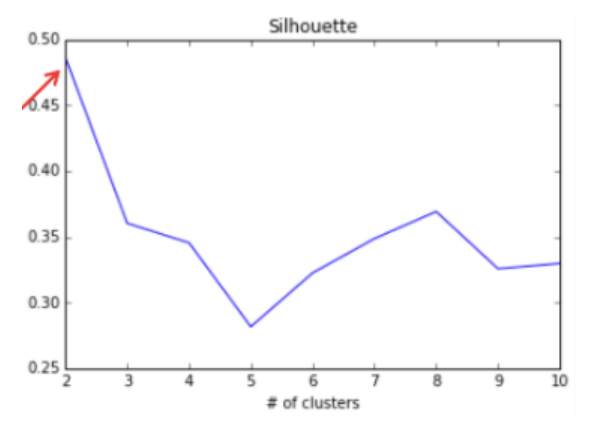

Pas sur du KelbowVisualizer mais je le pause la quand même
Il permet de visualiser l'

In [ ]:
# On utilise le KElbowVisualizer pour trouver le nombre de cluster le plus adapté

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)

visualiser = KElbowVisualizer(model, k=(3,12))

visualiser.fit(X_scaled)

visualiser.show()

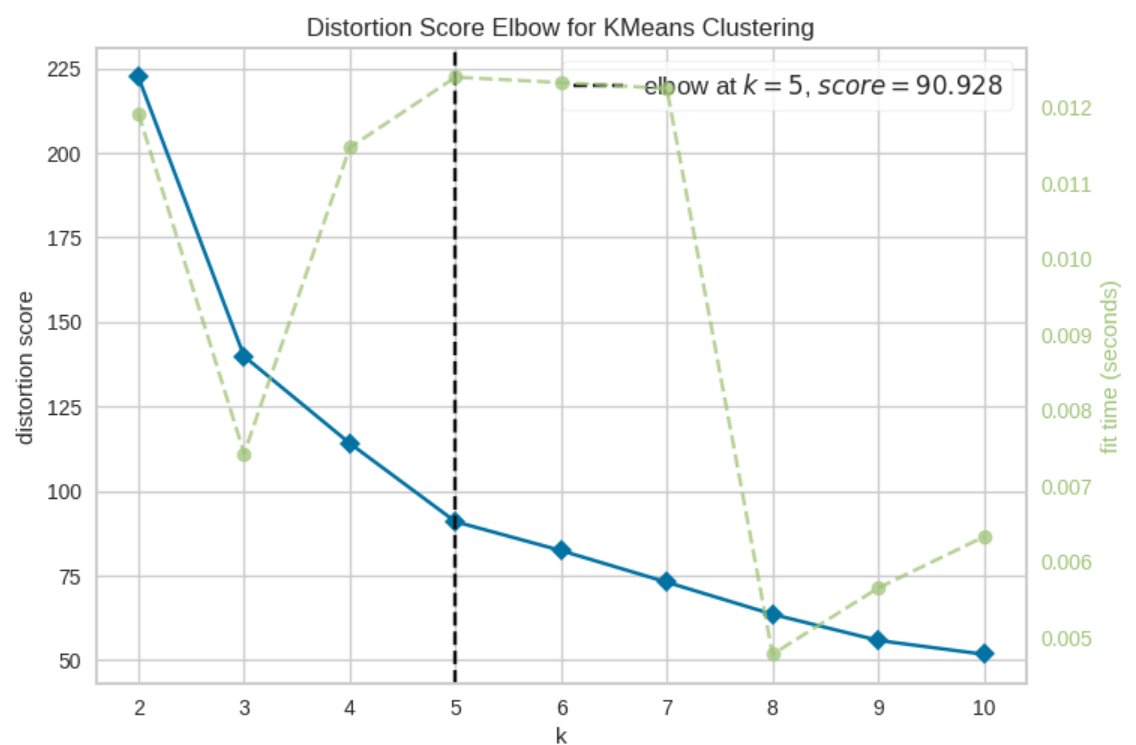